<a href="https://colab.research.google.com/github/week4-SpeechRecognition/Speech-to-Text/blob/data_loading/notebooks/abel_data_preProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/getalp/ALFFA_PUBLIC.git

In [ ]:
!du -sh ALFFA_PUBLIC/

In [ ]:
!du -sh ALFFA_PUBLIC/ASR/*

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount= True)

In [ ]:
!cp -r ALFFA_PUBLIC/ASR/AMHARIC ALFFA_PUBLIC/ASR/SWAHILI drive/MyDrive/week4audio

In [ ]:
!du -sh drive/MyDrive/week4audio/*

In [ ]:
!cp -r ALFFA_PUBLIC/ASR/SWAHILI drive/MyDrive/week4audio

In [ ]:
!du -sh drive/MyDrive/week4audio/*

In [ ]:
!du -sh drive/MyDrive/week4audio/SWAHILI/*

In [ ]:
!du -sh drive/MyDrive/week4audio/AMHARIC/*

In [1]:
# for audio processing
import os, sys
import librosa   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# importing local script
sys.path.insert(0,'../scripts/')
from audio_loader import AudioLoader

In [3]:
loader = AudioLoader()
trans = loader.loaderTrans("../data/train/trsTrain.txt")

In [4]:
trans

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [5]:
filenames, target, duration_of_recordings = loader.duration_target(trans,'../data/train/wav/')

In [6]:
len(filenames)

10874

In [7]:
len(target)

10874

In [8]:
len(duration_of_recordings)

10874

In [9]:
data = pd.DataFrame({'names': filenames,'text': target, 'duration':duration_of_recordings})

In [10]:
data.head()

,names,text,duration
0,../data/train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384
1,../data/train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592
2,../data/train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736
3,../data/train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192
4,../data/train/wav/tr_6_tr01006.wav,ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...,8.704


In [11]:
def text_length(df: pd.DataFrame, column: str) -> list:
            '''
            # Calculates the length of the text in the given column
            # @param df: The dataframe containing the text
            # @param column: The column containing the text
            # @return: The length of the text in the given column
            '''
            length_text = []

            for i in df[column]:
                length_text.append(len(i))
            return length_text

In [12]:
len_txt = text_length(data, 'text')

In [13]:
data['text_length'] = pd.DataFrame(len_txt)

In [14]:
data.head()

,names,text,duration,text_length
0,../data/train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384,129
1,../data/train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592,103
2,../data/train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736,27
3,../data/train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192,50
4,../data/train/wav/tr_6_tr01006.wav,ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...,8.704,69


In [15]:
data.describe()

,duration,text_length
count,10874.000000,10874.000000
mean,6.631413,56.971951
std,3.068505,28.733425
min,1.792000,12.000000
25%,4.352000,34.000000
50%,5.760000,49.000000
75%,8.320000,75.000000
max,24.192000,165.000000


In [16]:
from data_exploration import exploration

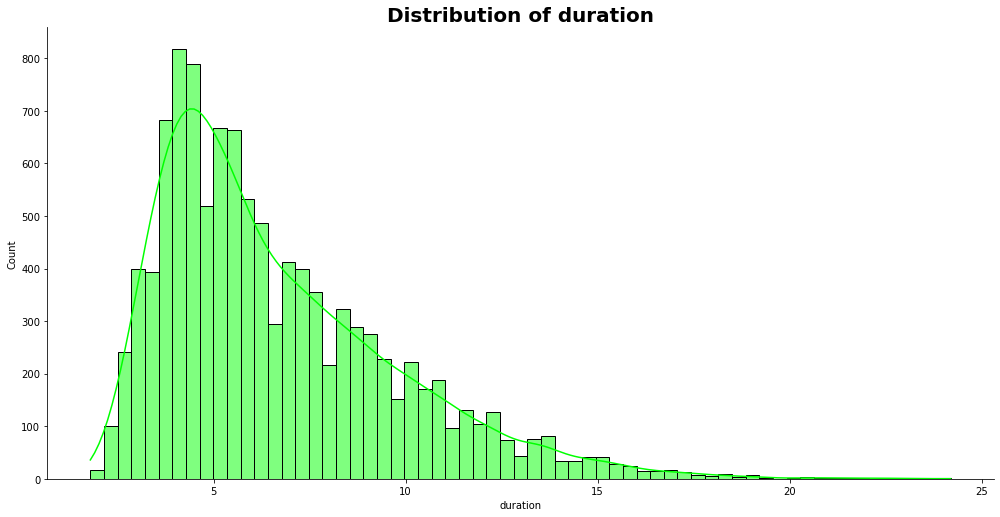

In [17]:
exploration.plot_hist(data, 'duration', 'lime')

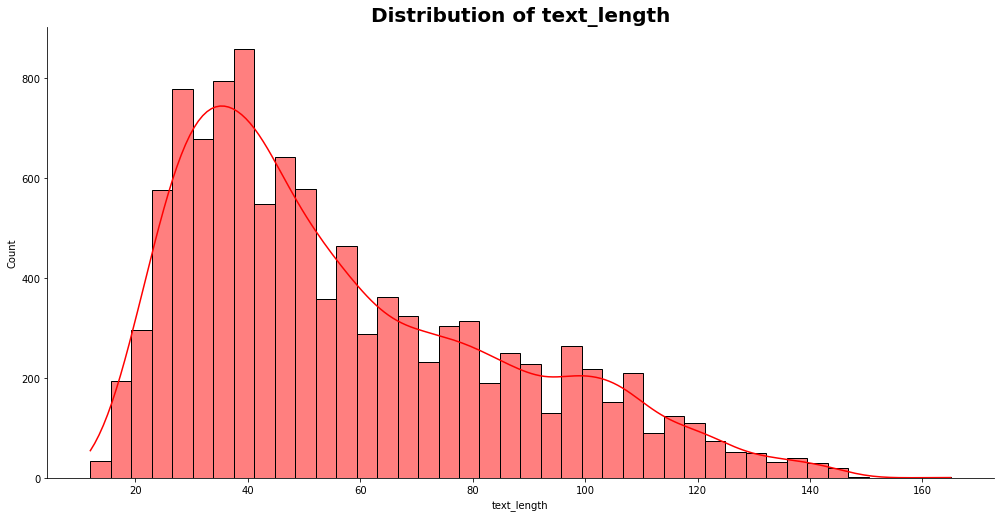

In [18]:
exploration.plot_hist(data, 'text_length', 'red')

In [28]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
class AudioUtils():
  # ----------------------------
  # Load an audio file. Return the audio as a array and rate
  # ----------------------------
  def opens(audio_file_loc, sr=22000):
    samples, sample_rate = librosa.load(audio_file_loc, sr=sr)
    return (samples, sample_rate)
  def play_audio(samples, sample_rate):
    return ipd.Audio(samples, rate=sample_rate)

In [29]:
open_audios = AudioUtils
samples, sample_rate = open_audios.opens(audio_file_loc = data.names[0])
open_audios.play_audio(samples, sample_rate)

In [30]:
samples.shape

(360448,)

In [31]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
  
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [32]:
spe_samples,frequency=spectrogram(samples)

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

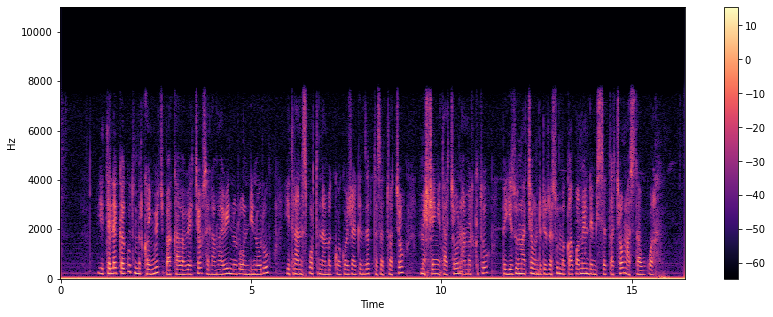

In [34]:
import librosa.display
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

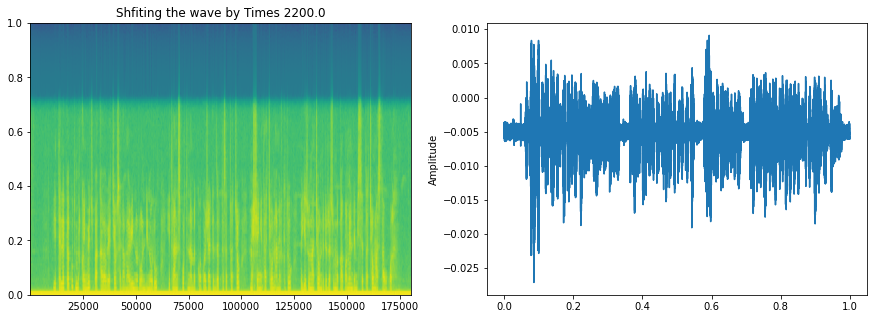

In [35]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/100))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)